# Photometry in pycoco

---------------------

## Introduction
This notebook aims to serve as a short tutorial (along with the others in this directory). In this notebook, the tools for adding/testing/plotting photometry in **`pycoco`**, as a companion to the **`c`** code **`CoCo`**.

**`CoCo`** takes photometry data in one input phot file. **`pycoco`** can be used to (*hopefully*) easily wrangle your exisiting photometry into the correct format.

In [88]:
from __future__ import print_function ## Force python3-like printing

%matplotlib inline
from matplotlib import pyplot as plt

import os
import numpy as np
from astropy.table import Table

import pycoco as pcc

reload(pcc) ## FOR DEV

<module 'pycoco' from '/Users/berto/Code/verbose-enigma/pycoco/__init__.py'>

## Using `PhotometryClass`

### `PhotometryClass` methods and variables

Photometry in **`pycoco`** is handled using **`PhotometryClass`** which has the methods and variables:

**`PhotometryClass.__init__`**

**`PhotometryClass._get_data_directory`**

**`PhotometryClass._combine_phot`**


**`PhotometryClass.set_data_directory`**

**`PhotometryClass.load_phot_from_file`**

**`PhotometryClass.load_phot_ap_tables`**

**`PhotometryClass.load`**

**`PhotometryClass.save`**

**`PhotometryClass.plot`**

**`PhotometryClass.save_phot`**


**`PhotometryClass._default_data_dir_path`**

# I/O

## File Input

You can load in phot files one by one, or you can use the **`PhotometryClass.load_phot_from_files()`** method, to find all of those that match a SN, or you can load in an appropriately formatted file with P. 

In [106]:
P = pcc.PhotometryClass()

SyntaxError: invalid syntax (<ipython-input-106-aaf29fc85bf0>, line 1)

In [ ]:
P.load_phot_from_files()

Oops! We need to provide a SN name!

In [91]:
P.load_phot_from_files(snname = 'SN2005bf')

Found: 
['SN1998bw.json', 'SN2005bf_B.dat', 'SN2005bf_SDSS_g.dat', 'SN2005bf_SDSS_i.dat', 'SN2005bf_SDSS_r.dat', 'SN2005bf_V.dat', 'TEST.dat']
Matched:
['/Users/berto/Code/verbose-enigma/testdata/SN2005bf_B.dat', '/Users/berto/Code/verbose-enigma/testdata/SN2005bf_SDSS_g.dat', '/Users/berto/Code/verbose-enigma/testdata/SN2005bf_SDSS_i.dat', '/Users/berto/Code/verbose-enigma/testdata/SN2005bf_SDSS_r.dat', '/Users/berto/Code/verbose-enigma/testdata/SN2005bf_V.dat']
/Users/berto/Code/verbose-enigma/testdata/SN2005bf_B.dat
1 B B
foo
foo
/Users/berto/Code/verbose-enigma/testdata/SN2005bf_SDSS_g.dat
1 SDSS_g SDSS_g
foo
foo
/Users/berto/Code/verbose-enigma/testdata/SN2005bf_SDSS_i.dat
1 SDSS_i SDSS_i
foo
foo
/Users/berto/Code/verbose-enigma/testdata/SN2005bf_SDSS_r.dat
1 SDSS_r SDSS_r
foo
foo
/Users/berto/Code/verbose-enigma/testdata/SN2005bf_V.dat
1 V V
foo
foo


The operation has run with `verbose = True`, so it has spat out quite a bit of information. Namely, it found 6 files in the (default) data directory. 
5 of these matched the specified SN name (SN2005bf). The full filepaths of these was printed as the files were iterated over and loaded in to **`astropy`** tables. The filters from the file data and file names are printed, and all seem to match.

Let's take a look at what is now in our PhotometryClass instance:

In [92]:
P.__dict__.keys()

['phot',
 'filter_directory',
 '_default_filter_dir_path',
 'data_directory',
 'data_filters',
 '_default_data_dir_path',
 'data']

Let's look at the data that was loaded in:

In [93]:
P.data.keys()

['B', 'SDSS_g', 'V', 'SDSS_r', 'SDSS_i']

In [94]:
P.data['B'].show_in_notebook(display_length = 10)

idx,MJD,flux,flux_err,filter,t
,d,erg / (Angstrom cm2 s),erg / (Angstrom cm2 s),,
0,53467.7,3.739383e-16,5.510559e-18,B,53467.7
1,53468.6,4.119078e-16,6.070097e-18,B,53468.6
2,53471.24492,5.340722e-16,9.837974e-18,B,53471.24492
3,53472.24774,5.791619e-16,1.013513e-17,B,53472.24774
4,53472.6,5.613064e-16,8.271717e-18,B,53472.6
5,53473.21264,5.981361e-16,1.101807e-17,B,53473.21264
6,53473.22608,6.047836e-16,1.114053e-17,B,53473.22608
7,53473.6,5.872189e-16,8.653577e-18,B,53473.6
8,53474.21104,6.171632e-16,1.080014e-17,B,53474.21104


This is good - all of the found photometry has been read in. 

If you have photometry that is already in **`astropy`** tables, then you can load it in using **`PhotometryClass.load_phot_ap_tables`**. There must be columns labelled `MJD`, `flux`, `flux_err` and `filter`.


This looks good! We have good spectral coverage.

**`CoCo`** takes as an input, one photometry file, with all of the data inside it. So far, we have used **`pycoco`** to read in several *different* photometry files. When **`PhotometryClass.load()`**

In [95]:
P.phot.show_in_notebook(display_length = 10)

idx,MJD,flux,flux_err,filter
,d,erg / (Angstrom cm2 s),erg / (Angstrom cm2 s),
0,53459.8,5.25291e-17,9.531075e-18,SDSS_r
1,53466.8,1.856949e-16,1.060394e-17,SDSS_r
2,53467.7,3.739383e-16,5.510559e-18,B
3,53467.7,1.256609e-16,1.736069e-18,SDSS_i
4,53467.7,3.654265e-16,5.048553e-18,SDSS_g
5,53467.7,2.10281e-16,2.905139e-18,SDSS_r
6,53467.7,2.64972e-16,3.660724e-18,V
7,53468.6,1.306171e-16,2.045147e-18,SDSS_i
8,53468.6,2.210039e-16,3.053282e-18,SDSS_r


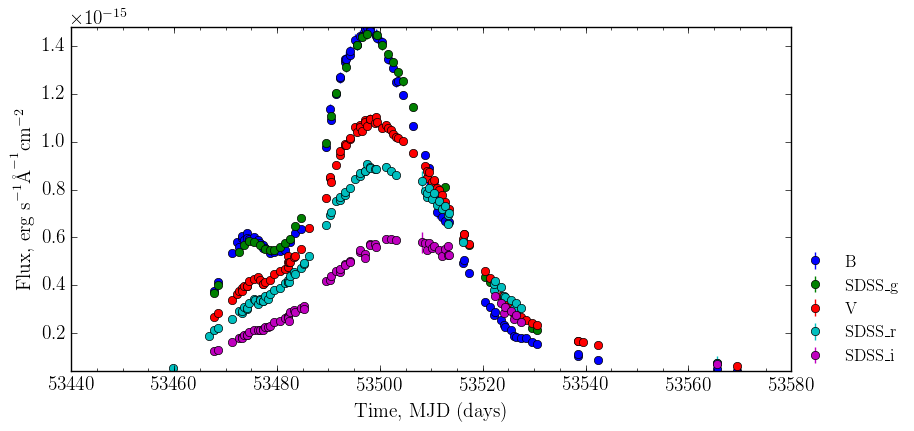

In [96]:
P.plot()

In [97]:
P.save("TEST.dat", squash = True)

has data
No directory specified, assuming /Users/berto/Code/verbose-enigma/testdata
Overwriting /Users/berto/Code/verbose-enigma/testdata/TEST.dat


In [98]:
Ptest = pcc.load("/Users/berto/Code/verbose-enigma/testdata/TEST.dat")
Ptest.phot.show_in_notebook(display_length = 10)

idx,MJD,flux,flux_err,filter
,d,erg / (Angstrom cm2 s),erg / (Angstrom cm2 s),
0,53459.8,5.25291e-17,9.531075e-18,SDSS_r
1,53466.8,1.856949e-16,1.060394e-17,SDSS_r
2,53467.7,3.739383e-16,5.510559e-18,B
3,53467.7,1.256609e-16,1.736069e-18,SDSS_i
4,53467.7,3.654265e-16,5.048553e-18,SDSS_g
5,53467.7,2.10281e-16,2.905139e-18,SDSS_r
6,53467.7,2.64972e-16,3.660724e-18,V
7,53468.6,1.306171e-16,2.045147e-18,SDSS_i
8,53468.6,2.210039e-16,3.053282e-18,SDSS_r


In [99]:
# filter_names = np.unique(Ptest.phot["filter"]) 
# filter_names
# # Ptest.phot.group_by([f for f in filter_names])
# Ptest.phot.add_index('filter')
# Ptest.phot.loc["filter", "B"]
# phot_table = Ptest.phot.loc["filter", "B"]
# # phot_table.sort("MJD")
# # phot_table.show_in_notebook()
# x = phot_table
# phot_table.columns
# indices = phot_table.argsort("MJD")
# phot_table.colnames
# newtable = Table([phot_table[column_name][indices] for column_name in phot_table.colnames])
# newtable
# phot_table.show_in_notebook()

In [100]:
Ptest.unpack()

    MJD              flux                 flux_err        filter
     d      erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)       
----------- ---------------------- ---------------------- ------
 53499.1631           1.448105e-15           2.400757e-17      B
53512.16661           6.873849e-16           1.772694e-17      B
    53512.7           6.680362e-16           1.107511e-17      B
    53484.6           6.350384e-16           9.358272e-18      B
    53483.5           6.177319e-16           9.103233e-18      B
    53497.5           1.480471e-15           2.181703e-17      B
    53482.5           5.796956e-16           1.334798e-17      B
    53501.5           1.345241e-15            1.98242e-17      B
    53513.5           6.625215e-16           9.763278e-18      B
53516.17168           4.929467e-16           8.626394e-18      B
        ...                    ...                    ...    ...
    53468.6           4.119078e-16           6.070097e-18      B
53524.15944           2.3

In [101]:
Ptest.data.keys()

['B', 'SDSS_g', 'SDSS_i', 'SDSS_r', 'V']

In [102]:
Ptest.data_filters

OrderedDict([('B', <pycoco.FilterClass instance at 0x10aea7320>),
             ('SDSS_g', <pycoco.FilterClass instance at 0x10a5a0b00>),
             ('SDSS_i', <pycoco.FilterClass instance at 0x105346cf8>),
             ('SDSS_r', <pycoco.FilterClass instance at 0x10acba368>),
             ('V', <pycoco.FilterClass instance at 0x10a5a7b48>)])

What we will demonstrate now is associating **`FilterClass`** with the photometry. **`PhotometryClass`** knows about the default filter directory (but another can be specified using **`PhotometryClass.set_filter_directory`**):

In [103]:
P.filter_directory

'/Users/berto/Code/CoCo/data/filters'

The **`PhotometryClass.load_from_files()`** method automatically searches the filter directory for the appropriate filters, and loads them in. For more on **`pycocoo.FilterClass`** see `pycoco_adding_filters.ipynb`.

If we take a look, we can see that we have 5 **`FilterClass`** instances, one for each of the photometry files.

In [104]:
P.data_filters

OrderedDict([('B', <pycoco.FilterClass instance at 0x10c1ce440>),
             ('SDSS_g', <pycoco.FilterClass instance at 0x10b37e0e0>),
             ('V', <pycoco.FilterClass instance at 0x10b3675f0>),
             ('SDSS_r', <pycoco.FilterClass instance at 0x10b0c13f8>),
             ('SDSS_i', <pycoco.FilterClass instance at 0x10b37d3f8>)])

We can have a look at the spectral coverage of the photometry by using the **`PhotometryClass.plot_filters()`** method:

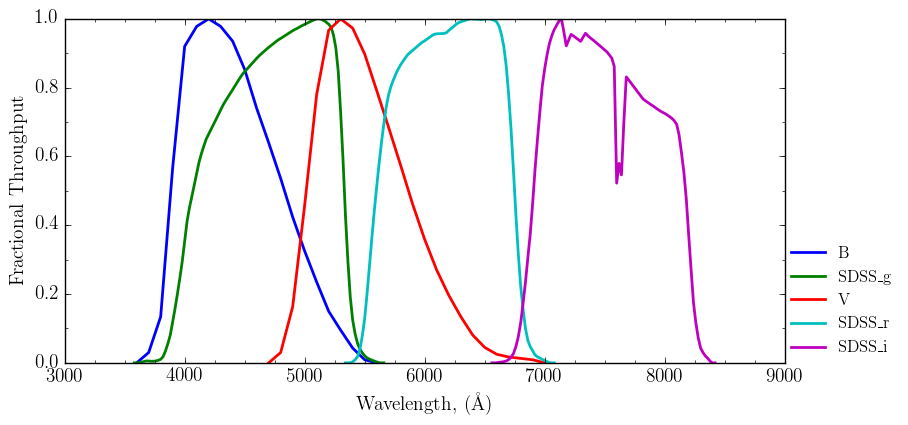

In [105]:
P.plot_filters(legend = True)